In [14]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import iris.analysis.cartography
import iris.plot as iplt
import iris.quickplot as qplt
import numpy as np
import matplotlib.ticker as mticker 
from numpy import *
from matplotlib.pyplot import *
from iris.analysis import *
from iris.coord_categorisation import * 
from iris.analysis.cartography import * 
from scipy.stats import *
from scipy.stats.mstats import *
from iris import *

import warnings
warnings.filterwarnings("ignore")


fgname = ('/Users/alicebrindley/Downloads/GFDL-ESM-pi-control-fgco2/outfile')
fgcube = iris.load(fgname)
fgcube1=fgcube[0]

#extract austral summer months to average the sea ice concentration
add_month_number(fgcube1, 'time', name='month_number')
fgcube2 = fgcube1[np.where((fgcube1.coord('month_number').points == 12)  | (fgcube1.coord('month_number') == 1)  |(fgcube1.coord('month_number') == 2))]
add_season_year(fgcube2, 'time', name='season_year')
fgcube2.aggregated_by(['season_year'], iris.analysis.MEAN)

add_month_number(fgcube1, 'time', name='month_number6')
fgcube4 = fgcube1[np.where((fgcube1.coord('month_number6').points == 6) | (fgcube1.coord('month_number') == 7)  |(fgcube1.coord('month_number') == 8))]
add_season_year(fgcube4, 'time', name='season_year')
fgcube4.aggregated_by(['season_year'], iris.analysis.MEAN)

west = -210 
east = -120 
south = -65
north = -55

fg_temporary_cube = fgcube2.intersection(longitude = (west, east)) 
fgcube2 = fg_temporary_cube.intersection(latitude = (south, north))

fg_temporary_cube2 = fgcube4.intersection(longitude = (west, east)) 
fgcube4 = fg_temporary_cube2.intersection(latitude = (south, north))

fgcube3=fgcube2*31536000000
fgcube5=fgcube4*31536000000

In [15]:
def area_avg(cube): 
    try:
        cube.coord('latitude').guess_bounds() 
    except:
        pass 
    try:
        cube.coord('longitude').guess_bounds() 
    except:
        pass
    grid_areas = iris.analysis.cartography.area_weights(cube)
    return cube.collapsed(['longitude', 'latitude'],iris.analysis.MEAN, weights=grid_areas)
        

In [16]:
masked_co2_flux_timeseries = area_avg(fgcube3)
masked_co2_flux_timeseries1 = area_avg(fgcube5)

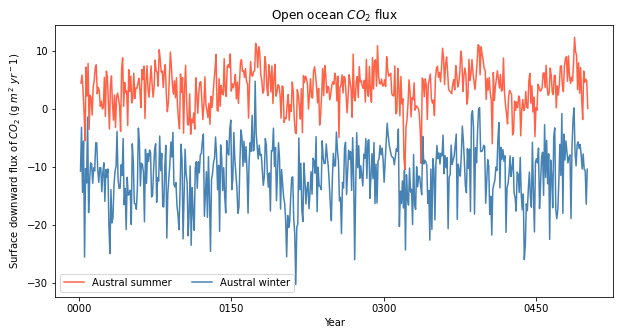

In [17]:
plt.figure(figsize=(10,5)) 
iplt.plot(masked_co2_flux_timeseries,label="Austral summer", color="tomato", lw=1.5) 
iplt.plot(masked_co2_flux_timeseries1, label='Austral winter', color="steelblue", lw=1.5) 
plt.title('Open ocean $CO_2$ flux')

plt.legend(ncol=2)
plt.ylabel('Surface downward flux of $CO_2$ (g $m^2$ $yr^-1$)') 
plt.xlabel('Year')
plt.savefig('open_ocean_flux')

In [22]:
print(np.std(masked_co2_flux_timeseries.data)) #summer

3.504642532398423


In [25]:
print(np.std(masked_co2_flux_timeseries1.data))

5.165082442197637
